# TCR Innovation Project (Machine Learning with Python)

**Name - Subhraneel Saha**

<font color=lightgrey>-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</font>

# Automation of Loan Prediction and Eligibility

<font color=lightgrey>-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</font>

This data is about that company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.

Here we try to find the best eligibility criteria using **random forest classification**.

**What is Loan Prediction?**

Loan Prediction system is a system which provides you a interface for loan approval to the applicants application of loan. Applicants provides the system about their personal information and according to their information system gives his status of availability of loan.

***The two main objectives of this project are:-***

1) Identification of Relevant Attributes.

2) Determining the best model.

**What is Data Mining?**

Data Mining is the process of discovering patterns in a large dataset involving methods and instructions of Machine Learning and Database Systems.

***There are different Data Mining Techniques:-***

Classification,
Clustering,
Asssociation Rule Mining,
Regression, etc.

**Knowledge Extraction**

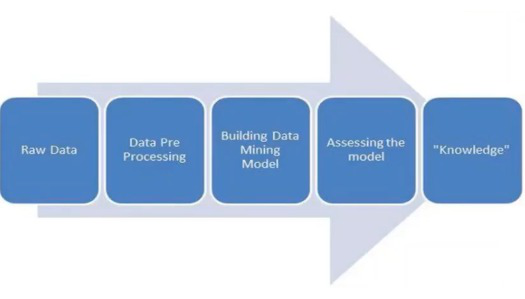

In [1]:
from PIL import Image
img = Image.open('knowlege_extraction.jpeg')
img

**Proposed Model**

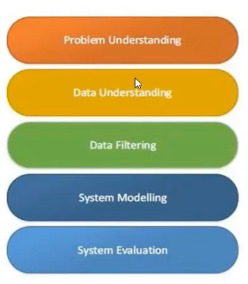

In [2]:
from PIL import Image
img = Image.open('proposed_model.jpeg')
img

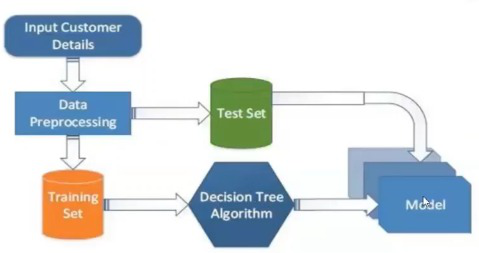

In [3]:
img1 = Image.open('architecture_proposed_model.jpeg')
img1

**1) Exporting the loan dataset**

**1.1) The libraries**

In [4]:
#Import Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

**1.2) We make the call to load and read the data that was downloaded from kaggle. Take note at the relative path reference to find the file in your file directory.**

In [5]:
#Read CSV data
loan_data = pd.read_csv("loan_data_set.csv")

**1.3) Preliminary inspection**

In [6]:
#Preview Data
loan_data.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [7]:
loan_data.tail(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
604,LP002959,Female,Yes,1,Graduate,No,12000,0.0,496.0,360.0,1.0,Semiurban,Y
605,LP002960,Male,Yes,0,Not Graduate,No,2400,3800.0,NaN,180.0,1.0,Urban,N
606,LP002961,Male,Yes,1,Graduate,No,3400,2500.0,173.0,360.0,1.0,Semiurban,Y
607,LP002964,Male,Yes,2,Not Graduate,No,3987,1411.0,157.0,360.0,1.0,Rural,Y
608,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


**1.4) Data Type**

In [8]:
#Preview Data Information
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


**1.5) Processing the Dataset**

In [9]:
#Check missing values
loan_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

**2) Exploratory Data Analysis**

In [10]:
#percent of missing "Gender"
print('Percent of missing "Gender" records is %.2f%%' %((loan_data['Gender'].isnull().sum()/loan_data.shape[0])*100))

Percent of missing "Gender" records is 2.12%


Number of people who take loan group by gender :
Male      489
Female    112
Name: Gender, dtype: int64


<AxesSubplot:xlabel='Gender', ylabel='count'>

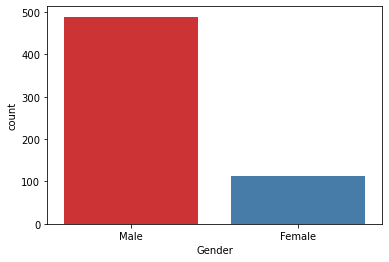

In [11]:
print("Number of people who take loan group by gender :")
print(loan_data['Gender'].value_counts())
sns.countplot(x='Gender', data=loan_data, palette = 'Set1')

In [12]:
#percent of missing "Married"
print('Percent of missing "Married" records is %.2f%%' %((loan_data['Married'].isnull().sum()/loan_data.shape[0])*100))

Percent of missing "Married" records is 0.49%


Number of people who take a loan group by marital status: 
Yes    398
No     213
Name: Married, dtype: int64


<AxesSubplot:xlabel='Married', ylabel='count'>

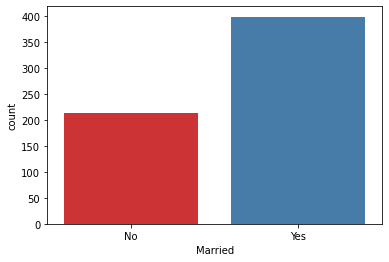

In [13]:
print("Number of people who take a loan group by marital status: ")
print(loan_data['Married'].value_counts())
sns.countplot(x='Married', data=loan_data, palette='Set1')

In [14]:
#percent of missing "Dependents"
print('Percent of missing "Dependents" records is %.2f%%' %((loan_data['Dependents'].isnull().sum()/loan_data.shape[0])*100))

Percent of missing "Dependents" records is 2.44%


Number of people who take a loan group by dependents : 
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64


<AxesSubplot:xlabel='Dependents', ylabel='count'>

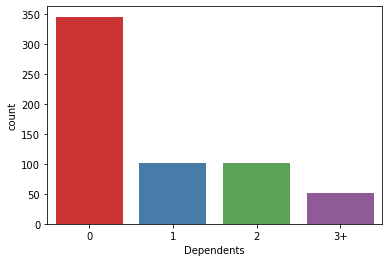

In [15]:
print("Number of people who take a loan group by dependents : ")
print(loan_data['Dependents'].value_counts())
sns.countplot(x='Dependents', data=loan_data, palette='Set1')

In [16]:
# percent of missing "Self_Employed"
print('Percent of missing "Self_Employed" records is %.2f%%' %((loan_data['Self_Employed'].isnull().sum()/loan_data.shape[0])*100))

Percent of missing "Self_Employed" records is 5.21%


Number of people who take a loan group by self employed : 
No     500
Yes     82
Name: Self_Employed, dtype: int64


<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

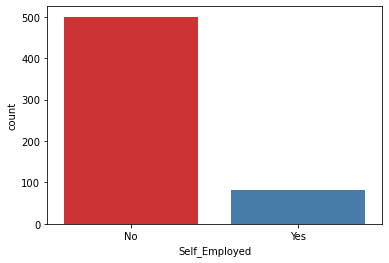

In [17]:
print("Number of people who take a loan group by self employed : ")
print(loan_data['Self_Employed'].value_counts())
sns.countplot(x='Self_Employed', data=loan_data, palette='Set1')

In [18]:
#percent of missing "LoanAmount"
print('Percent of missing "LoanAmount" records is %.2f%%' %((loan_data['LoanAmount'].isnull().sum()/loan_data.shape[0])*100))

Percent of missing "LoanAmount" records is 3.58%


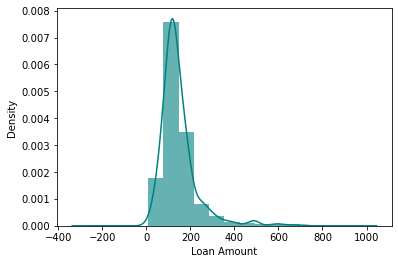

In [19]:
ax = loan_data["LoanAmount"].hist(density=True, stacked=True, color='teal', alpha=0.6)
loan_data["LoanAmount"].plot(kind='density', color='teal')
ax.set(xlabel='Loan Amount')
plt.show()

In [20]:
#percent of missing "Loan_Amount_Term"
print('Percent of missing "Loan_Amount_Term" records is %.2f%%' %((loan_data['Loan_Amount_Term'].isnull().sum()/loan_data.shape[0])*100))

Percent of missing "Loan_Amount_Term" records is 2.28%


Number of people who take a loan group by loan amount term : 
360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64


<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='count'>

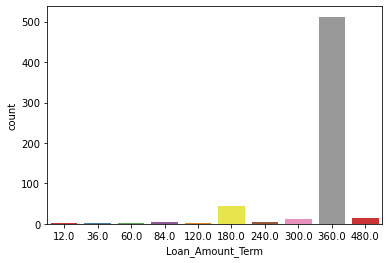

In [21]:
print("Number of people who take a loan group by loan amount term : ")
print(loan_data['Loan_Amount_Term'].value_counts())
sns.countplot(x='Loan_Amount_Term', data=loan_data, palette='Set1')

In [22]:
#percent of missing "Credit_History"
print('Percent of missing "Credit_History" records is %.2f%%' %((loan_data['Credit_History'].isnull().sum()/loan_data.shape[0])*100))

Percent of missing "Credit_History" records is 8.14%


Number of people who take a loan group by credit history : 
1.0    475
0.0     89
Name: Credit_History, dtype: int64


<AxesSubplot:xlabel='Credit_History', ylabel='count'>

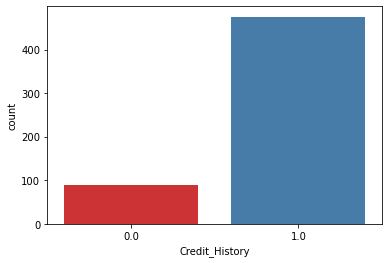

In [23]:
print("Number of people who take a loan group by credit history : ")
print(loan_data['Credit_History'].value_counts())
sns.countplot(x='Credit_History', data=loan_data, palette='Set1')

In [24]:
train_data = loan_data.copy()
train_data['Gender'].fillna(train_data['Gender'].value_counts().idxmax(), inplace=True)
train_data['Married'].fillna(train_data['Married'].value_counts().idxmax(), inplace=True)
train_data['Dependents'].fillna(train_data['Dependents'].value_counts().idxmax(), inplace=True)
train_data['Self_Employed'].fillna(train_data['Self_Employed'].value_counts().idxmax(), inplace=True)
train_data['LoanAmount'].fillna(train_data['LoanAmount'].value_counts().idxmax(), inplace=True)
train_data['Loan_Amount_Term'].fillna(train_data['Loan_Amount_Term'].value_counts().idxmax(), inplace=True)
train_data['Credit_History'].fillna(train_data['Credit_History'].value_counts().idxmax(), inplace=True)

In [25]:
train_data.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [26]:
#Check missing values
train_data.isnull().sum()
train_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [36]:
#Convert some object data type to int64
gender_stat = {"Female": 0, "Male": 1}
yes_no_stat = {'No' : 0, 'Yes' : 1}
dependents_stat = {'0':0, '1':1, '2':2, '3+':3}
education_stat = {'Not Graduate' : 0, 'Graduate' : 1}
property_stat = {'Semiurban' : 0, 'Urban' : 1, 'Rural' : 2}

train_data['Gender'] = train_data['Gender'].replace(gender_stat)
train_data['Married'] = train_data['Married'].replace(yes_no_stat)
train_data['Dependents'] = train_data['Dependents'].replace(dependents_stat)
train_data['Education'] = train_data['Education'].replace(education_stat)
train_data['Self_Employed'] = train_data['Self_Employed'].replace(yes_no_stat)
train_data['Property_Area'] = train_data['Property_Area'].replace(property_stat)

In [37]:
train_data.head(11)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,120.0,360.0,1.0,1,Y
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,2,N
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,Y
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,Y
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,Y
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1,Y
6,LP001013,1,1,0,0,0,2333,1516.0,95.0,360.0,1.0,1,Y
7,LP001014,1,1,3,1,0,3036,2504.0,158.0,360.0,0.0,0,N
8,LP001018,1,1,2,1,0,4006,1526.0,168.0,360.0,1.0,1,Y
9,LP001020,1,1,1,1,0,12841,10968.0,349.0,360.0,1.0,0,N


In [38]:
#Preview data information
train_data.info()
train_data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    int64  
 2   Married            614 non-null    int64  
 3   Dependents         614 non-null    int64  
 4   Education          614 non-null    int64  
 5   Self_Employed      614 non-null    int64  
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    int64  
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(7), object(2)
memory usage: 62.5+ KB


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [39]:
#Separate feature and target
x = train_data.iloc[:,1:10]
y = train_data.iloc[:,10]

#make variable for save the result and to show it
classifier = ('Random Forest','Decision Tree','K-Nearest Neighbor','SVM')
y_pos = np.arange(len(classifier))
score = []

In [40]:
#random Forest
clf = RandomForestClassifier(n_estimators=200)
scores = cross_val_score(clf, x, y, cv=5)
score.append(scores.mean())
print('The accuration of classification is %.2f%%' %(scores.mean()*100))

The accuration of classification is 85.02%


In [41]:
#Decision Tree
clf = DecisionTreeClassifier()
scores = cross_val_score(clf, x, y, cv=5)
score.append(scores.mean())
print('The accuration of classification is %.2f%%' %(scores.mean()*100))

The accuration of classification is 76.23%


In [42]:
#KNN
clf = KNeighborsClassifier()
scores = cross_val_score(clf, x, y, cv=5)
score.append(scores.mean())
print('The accuration of classification is %.2f%%' %(scores.mean()*100))

The accuration of classification is 83.39%


In [44]:
#linear SVM
clf = svm.LinearSVC(max_iter=5000)
scores = cross_val_score(clf, x, y, cv=5)
score.append(scores.mean())
print('The accuration of classification is %.2f%%' %(scores.mean()*100))

C:\Users\Subhraneel Saha\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Subhraneel Saha\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Subhraneel Saha\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Subhraneel Saha\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Subhraneel Saha\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear fai

The accuration of classification is 85.51%


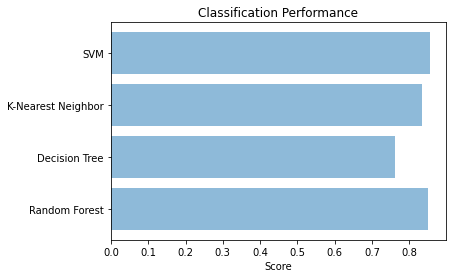

In [45]:
plt.barh(y_pos, score, align = 'center', alpha=0.5)
plt.yticks(y_pos, classifier)
plt.xlabel('Score')
plt.title('Classification Performance')
plt.show()

**3) Creation of new attributes**

In [46]:
#total income
train_data['Total_Income'] = train_data['ApplicantIncome'] + train_data['CoapplicantIncome']
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,1,0,0,1,0,5849,0.0,120.0,360.0,1.0,1,Y,5849.0
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,2,N,6091.0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,Y,3000.0
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,Y,4941.0
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,Y,6000.0


**4) Log Transformation**

C:\Users\Subhraneel Saha\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ApplicantIncomeLog', ylabel='Density'>

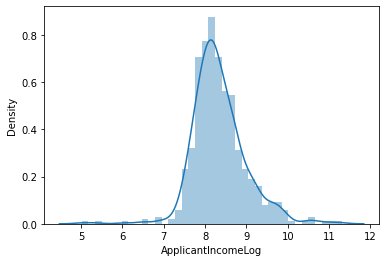

In [48]:
#apply log transformation to the attribute
train_data['ApplicantIncomeLog'] = np.log(train_data['ApplicantIncome'])
sns.distplot(train_data["ApplicantIncomeLog"])

C:\Users\Subhraneel Saha\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Subhraneel Saha\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ApplicantIncomeLog', ylabel='Density'>

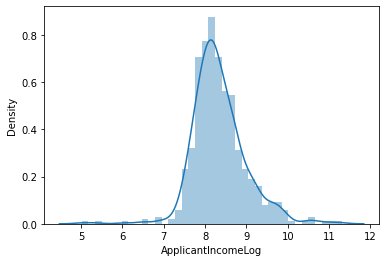

In [51]:
train_data['CoapplicantIncomeLog'] = np.log(train_data['CoapplicantIncome'])
sns.distplot(train_data["ApplicantIncomeLog"])

C:\Users\Subhraneel Saha\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LoanAmountLog', ylabel='Density'>

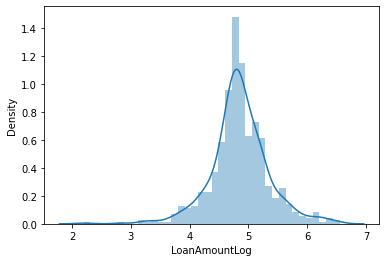

In [53]:
train_data['LoanAmountLog'] = np.log(train_data['LoanAmount'])
sns.distplot(train_data["LoanAmountLog"])

C:\Users\Subhraneel Saha\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Loan_Amount_Term_Log', ylabel='Density'>

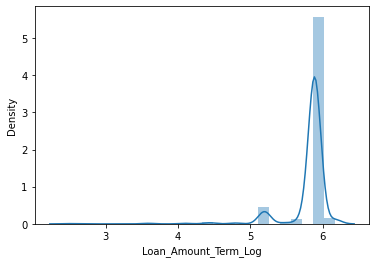

In [55]:
train_data['Loan_Amount_Term_Log'] = np.log(train_data['Loan_Amount_Term'])
sns.distplot(train_data["Loan_Amount_Term_Log"])

C:\Users\Subhraneel Saha\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Total_Income_Log', ylabel='Density'>

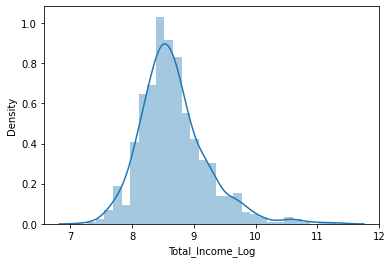

In [56]:
train_data['Total_Income_Log'] = np.log(train_data['Total_Income'])
sns.distplot(train_data["Total_Income_Log"])

**5) Correlation Matrix**

<AxesSubplot:>

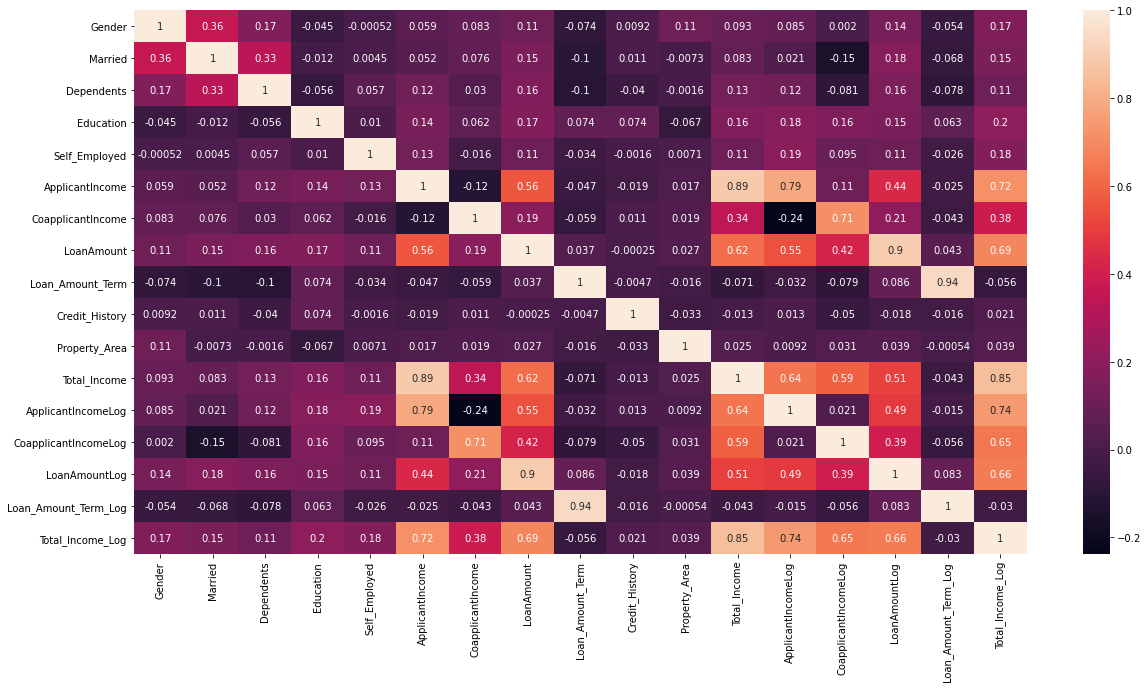

In [76]:
corr = train_data.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot = True)

In [77]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,ApplicantIncomeLog,CoapplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,LP001002,1,0,0,1,0,5849,0.0,120.0,360.0,1.0,1,Y,5849.0,8.674026,-inf,4.787492,5.886104,8.674026
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,2,N,6091.0,8.430109,7.318540,4.852030,5.886104,8.714568
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,Y,3000.0,8.006368,-inf,4.189655,5.886104,8.006368
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,Y,4941.0,7.856707,7.765569,4.787492,5.886104,8.505323
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,Y,6000.0,8.699515,-inf,4.948760,5.886104,8.699515


In [78]:
# drop unncessary columns
cols = ['ApplicantIncome', 'CoapplicantIncome', "LoanAmount", "Loan_Amount_Term", "Total_Income", 'Loan_ID', 'CoapplicantIncomeLog']
train_data = train_data.drop(columns=cols, axis=1)
train_data.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,1,0,0,1,0,1.0,1,Y,8.674026,4.787492,5.886104,8.674026
1,1,1,1,1,0,1.0,2,N,8.430109,4.852030,5.886104,8.714568
2,1,1,0,1,1,1.0,1,Y,8.006368,4.189655,5.886104,8.006368
3,1,1,0,0,0,1.0,1,Y,7.856707,4.787492,5.886104,8.505323
4,1,0,0,1,0,1.0,1,Y,8.699515,4.948760,5.886104,8.699515


**6) Label Encoding**

In [84]:
from sklearn.preprocessing import LabelEncoder
cols = ['Gender',"Married","Education",'Self_Employed',"Property_Area","Loan_Status","Dependents"]
le = LabelEncoder()
for col in cols:
    train_data[col] = le.fit_transform(train_data[col])

In [85]:
train_data.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,1,0,0,1,0,1.0,1,1,8.674026,4.787492,5.886104,8.674026
1,1,1,1,1,0,1.0,2,0,8.430109,4.852030,5.886104,8.714568
2,1,1,0,1,1,1.0,1,1,8.006368,4.189655,5.886104,8.006368
3,1,1,0,0,0,1.0,1,1,7.856707,4.787492,5.886104,8.505323
4,1,0,0,1,0,1.0,1,1,8.699515,4.948760,5.886104,8.699515


**7) Train-Test Split**

In [86]:
# specify input and output attributes
x = train_data.drop(columns=['Loan_Status'], axis=1)
y = train_data['Loan_Status']

In [87]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

**8) Model Training**

In [90]:
# classify function
from sklearn.model_selection import cross_val_score
def classify(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
    model.fit(x_train, y_train)
    print("Accuracy is", model.score(x_test, y_test)*100)
    # cross validation - it is used for better validation of model
    # eg: cv-5, train-4, test-1
    score = cross_val_score(model, x, y, cv=5)
    print("Cross validation is:",np.mean(score)*100)

In [91]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model, x, y)

Accuracy is 77.27272727272727
Cross validation is: 80.9462881514061


C:\Users\Subhraneel Saha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Subhraneel Saha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

In [92]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model, x, y)

Accuracy is 74.02597402597402
Cross validation is: 73.29868052778889


In [93]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
model = RandomForestClassifier()
classify(model, x, y)

Accuracy is 78.57142857142857
Cross validation is: 79.15500466480076


In [94]:
model = ExtraTreesClassifier()
classify(model, x, y)

Accuracy is 73.37662337662337
Cross validation is: 77.19712115153938


**9) Hyperparameter Tuning**

In [99]:
model = RandomForestClassifier(n_estimators=100, min_samples_split=25, max_depth=7, max_features=1)
classify(model, x, y)

Accuracy is 77.27272727272727
Cross validation is: 79.48154071704651


**10) Confusion Matrix**

A confusion matrix is a summary of prediction results on a classification problem. The number of correct and incorrect predictions are summarized with count values and broken down by each class. It gives us insight not only into the errors being made by a classifier but more importantly the types of errors that are being made.

In [102]:
model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

This means there are no errors.

In [103]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[22, 32],
       [ 3, 97]], dtype=int64)

<AxesSubplot:>

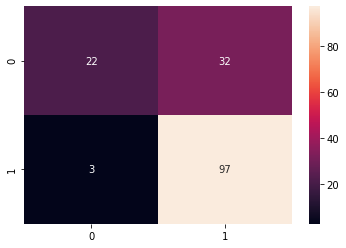

In [104]:
sns.heatmap(cm, annot=True)

For actual values of **0**, **22** is predicted correctly and for actual values **1**, **97** is predicted correctly. Hence, in the confusion matrix the left diagonal is predicted **correctly**. On the other hand in the right diagonal, for actual values of **0**, **32** is predicted correctly but for actual values of **1**, **3** is predicted incorrectly. Hence, in the confusion matrix the right diagonal is predicted **incorrectly**.